In [1]:
%matplotlib notebook

In [2]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = (session.query(measurement.date).order_by(measurement.date.desc()).first())

print(most_recent_date)

('2017-08-23',)


In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
most_recent_datetime = dt.date(2017,8,23)

one_year = most_recent_datetime - dt.timedelta(366)

# Perform a query to retrieve the data and precipitation scores
#strftime = string from time // turns date into a string
year_precip=(session.query(measurement.date,func.avg(measurement.prcp)).filter(func.strftime('%Y-%m-%d',measurement.date) > one_year).group_by(measurement.date).all())


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(year_precip, columns = ['date', 'precipitation'])

# Sort the dataframe by date
precip_df.set_index('date', inplace = True)
precip_df.sort_values('date')


,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [30]:
#Get dates for labels
precip_df.iloc[[0,66,126,186,246,306,365]]

,precipitation
date,
2016-08-23,0.451667
2016-10-28,0.095000
2016-12-27,0.040000
2017-02-25,0.037500
2017-04-26,0.065000
2017-06-25,0.120000
2017-08-23,0.132500


<IPython.core.display.Javascript object>


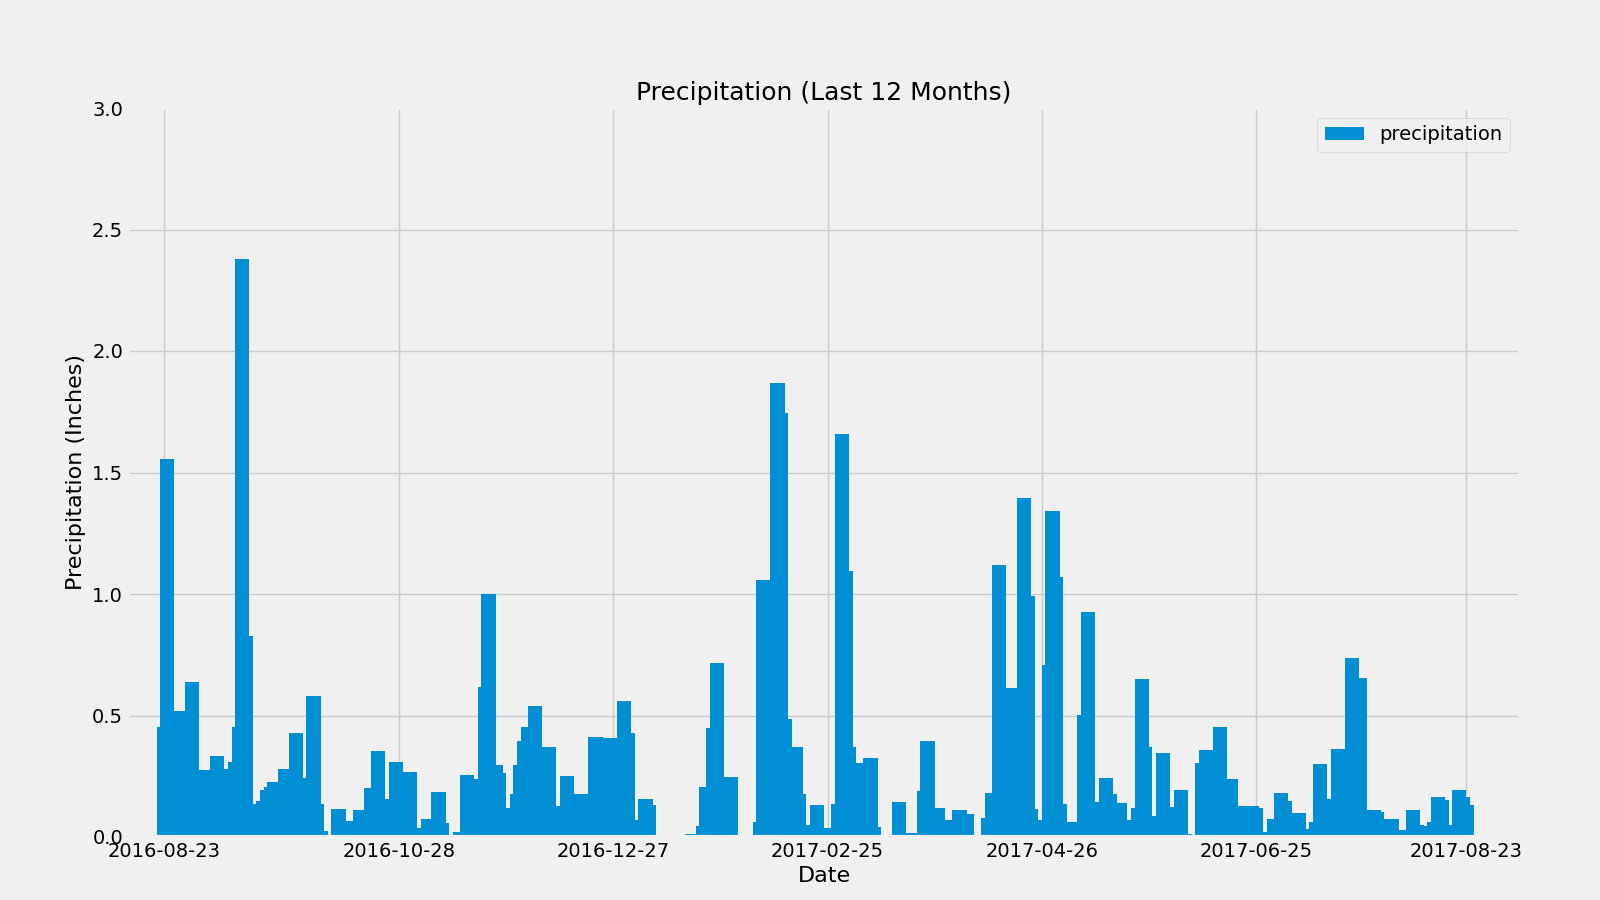

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot.bar(width=4, figsize=(16,9), xticks=(0,66,126,186,246,306,365), rot= 0)
plt.xlim(-10,380)
plt.ylim(0,3)
labels=['2016-08-23','2016-10-28','2016-12-27','2017-02-25','2017-04-26','2017-06-25','2017-08-23']
ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1,1), fontsize="14")
plt.title("Precipitation (Last 12 Months)", size=18)
plt.ylabel("Precipitation (Inches)", size=16)
plt.xlabel("Date", size=16)
plt.savefig("../Precipitation_Last_12_Months.png")
plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [34]:
#Find total number of entries from all stations combined in the dataset
all_station_queries = session.query(func.count(measurement.station)).all()
all_station_queries

[(19550,)]

In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_totals = session.query(station).count()

station_totals

9

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = (session.query(measurement.station, func.avg(measurement.tobs), func.max(measurement.tobs), func.min(measurement.tobs)).filter(measurement.station=='USC00519281').all())

most_active_station

[('USC00519281', 71.66378066378067, 85.0, 54.0)]

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and...
year_tobs=(session.query(measurement.station,measurement.tobs).filter(func.strftime(measurement.date) > one_year).filter(measurement.station=='USC00519281').all())

station_df = pd.DataFrame(year_tobs)



station_df

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


<IPython.core.display.Javascript object>


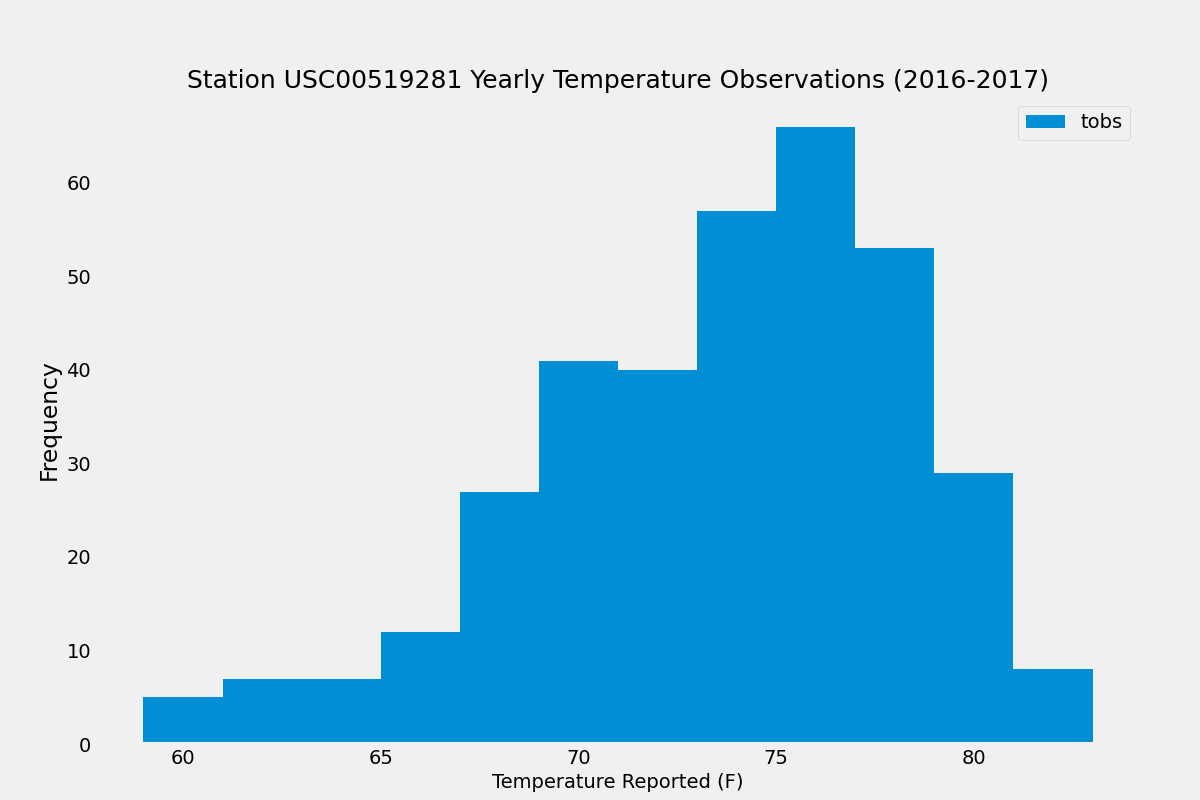

<function matplotlib.pyplot.show(*, block=None)>

In [38]:
#...plot the results as a histogram

station_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title(f"Station {most_active_station[0][0]} Yearly Temperature Observations (2016-2017)", fontsize=18)
plt.xlabel("Temperature Reported (F)", fontsize=14)
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.savefig("../Temperature_Observations_Best_Station.png")
plt.show


# Close Session

In [39]:
# Close Session
session.close()